In [304]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [305]:
df = pd.read_csv("vehicle.csv") 
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [306]:
print("Shape of Dataset: \nRows: {0}, Columns: {1}\n".format(df.shape[0], df.shape[1]))
print("Dataset Info: \n", df.info())

Shape of Dataset: 
Rows: 846, Columns: 19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2          

In [307]:
# All columns have numerical values

In [308]:
df["class"].unique()

array(['van', 'car', 'bus'], dtype=object)

In [309]:
print("Descriptive Statitics for the given dataset: \n")
df.describe()

Descriptive Statitics for the given dataset: 



,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [310]:
print("NaN values in dataset:\n", df.isna().sum())

NaN values in dataset:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [311]:
#Replacing NaN Values with Median
median_data = pd.Series(df.describe().iloc[5])
values_to_replace = {}

for col in df.columns:
    if(df[col].isna().sum() > 0):
        df[col].fillna(median_data[col], inplace = True)

print("NaN values in dataset:\n", df.isna().sum())

NaN values in dataset:
 compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [312]:
data = df

In [313]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [314]:
# We will consider all columns for outlier analysis except bus, van or car i.e. class as it is our target variable. 
capDf = pd.DataFrame()
toCapDf = data.loc[:,:]

In [315]:
for col in data.columns:
    if(col in ['class']):
        capDf[col] = data[col]
        continue
    if(col in toCapDf.columns):
        percentiles = toCapDf[col].quantile([0.25,0.75]).values
        Q1 = percentiles[0]
        Q3 = percentiles[1]
        IQR = Q3 - Q1
        minCap = Q1 - (IQR) * 1.5
        maxCap = Q3 + (IQR) * 1.5
        capDf[col] = toCapDf[col][(toCapDf[col] >= minCap) & (toCapDf[col] <= maxCap)]
    else:
        capDf[col] = data[col]
    
capDf.dropna(inplace=True);

In [316]:
#Printing the outliers which were removed (In all, 33 eligible outlier rows were removed)
outlierDf = pd.concat([data, capDf])
outlierDf = outlierDf.reset_index(drop=True)
df_gpby = outlierDf.groupby(list(outlierDf.columns))
idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
print("Rows Removed: ", outlierDf.reindex(idx).count())
outlierDf.reindex(idx)

Rows Removed:  compactness                    33
circularity                    33
distance_circularity           33
radius_ratio                   33
pr.axis_aspect_ratio           33
max.length_aspect_ratio        33
scatter_ratio                  33
elongatedness                  33
pr.axis_rectangularity         33
max.length_rectangularity      33
scaled_variance                33
scaled_variance.1              33
scaled_radius_of_gyration      33
scaled_radius_of_gyration.1    33
skewness_about                 33
skewness_about.1               33
skewness_about.2               33
hollows_ratio                  33
class                          33
dtype: int64


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
815,81,45.0,68.0,154.0,69.0,22.0,151.0,45.0,19.0,147,186.0,335.0,186.0,88.0,1.0,10.0,180.0,185,bus
706,82,43.0,70.0,250.0,105.0,55.0,139.0,48.0,18.0,145,231.0,289.0,172.0,99.0,4.0,9.0,190.0,199,van
100,82,45.0,66.0,252.0,126.0,52.0,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,bus
230,85,35.0,47.0,110.0,55.0,3.0,117.0,57.0,17.0,122,136.0,203.0,139.0,89.0,5.0,9.0,180.0,184,van
796,85,38.0,63.0,130.0,55.0,7.0,122.0,55.0,17.0,130,137.0,219.0,144.0,64.0,20.0,8.0,195.0,201,car
127,85,41.0,66.0,155.0,65.0,22.0,149.0,45.0,19.0,139,173.0,330.0,155.0,75.0,6.0,16.0,184.0,191,bus
47,85,42.0,66.0,122.0,54.0,6.0,148.0,46.0,19.0,141,172.0,317.0,174.0,88.0,6.0,14.0,180.0,182,bus
4,85,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
655,86,35.0,44.0,110.0,54.0,2.0,119.0,57.0,17.0,121,139.0,208.0,137.0,90.0,6.0,1.0,180.0,183,van
113,88,35.0,50.0,121.0,58.0,5.0,114.0,59.0,17.0,122,132.0,192.0,138.0,74.0,21.0,4.0,182.0,187,car


In [317]:
#One Hot Encoding using Pandas get Dummies, not choosing Label Encoder due to weighting problem
label_data = capDf['class']
dummies = pd.get_dummies(capDf['class'])
capDf[dummies.columns] = dummies
capDf = capDf.drop(columns = 'class', axis = 1)

In [318]:
# Check for correlation of variable
print("Correlation Analysis Table: \n")
capDf.corr()

Correlation Analysis Table: 



,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,bus,car,van
compactness,1.000000,0.679327,0.786824,0.745988,0.200634,0.497660,0.810842,-0.788560,0.811866,0.674166,...,0.812494,0.577688,-0.253678,0.200640,0.161106,0.295414,0.364160,-0.149233,0.299746,-0.200557
circularity,0.679327,1.000000,0.786778,0.640936,0.206156,0.564159,0.843765,-0.815764,0.840162,0.961220,...,0.832483,0.925142,0.066697,0.140391,-0.014342,-0.116832,0.039182,0.004597,0.202238,-0.244070
distance_circularity,0.786824,0.786778,1.000000,0.808331,0.245454,0.668833,0.905577,-0.908687,0.894783,0.768689,...,0.888193,0.702483,-0.237938,0.098813,0.263508,0.128912,0.321655,-0.204798,0.439308,-0.308312
radius_ratio,0.745988,0.640936,0.808331,1.000000,0.666209,0.460691,0.789523,-0.844025,0.763829,0.576791,...,0.776142,0.550545,-0.403176,0.040306,0.187190,0.418354,0.504693,-0.050307,0.403241,-0.425216
pr.axis_aspect_ratio,0.200634,0.206156,0.245454,0.666209,1.000000,0.138261,0.199971,-0.301918,0.169752,0.145857,...,0.186297,0.153509,-0.325102,-0.051539,-0.028583,0.406292,0.419801,0.193567,-0.035326,-0.158145
max.length_aspect_ratio,0.497660,0.564159,0.668833,0.460691,0.138261,1.000000,0.497466,-0.502377,0.497233,0.647844,...,0.457892,0.404288,-0.332752,0.084005,0.140972,0.056416,0.394449,-0.490686,0.338187,0.106663
scatter_ratio,0.810842,0.843765,0.905577,0.789523,0.199971,0.497466,1.000000,-0.972340,0.989441,0.807070,...,0.992982,0.794915,0.002444,0.063471,0.214182,-0.003100,0.116181,0.009747,0.378894,-0.458439
elongatedness,-0.788560,-0.815764,-0.908687,-0.844025,-0.301918,-0.502377,-0.972340,1.000000,-0.949943,-0.770034,...,-0.955797,-0.762407,0.086977,-0.045458,-0.183955,-0.105264,-0.211086,-0.056406,-0.373523,0.500279
pr.axis_rectangularity,0.811866,0.840162,0.894783,0.763829,0.169752,0.497233,0.989441,-0.949943,1.000000,0.810349,...,0.987773,0.792197,0.017769,0.072726,0.216626,-0.026470,0.097951,-0.012423,0.372699,-0.428206
max.length_rectangularity,0.674166,0.961220,0.768689,0.576791,0.145857,0.647844,0.807070,-0.770034,0.810349,1.000000,...,0.794071,0.866940,0.052585,0.134630,-0.002441,-0.117667,0.067177,-0.059500,0.138870,-0.102873


In [319]:
capDf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,bus,car,van
0,95,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159,...,379.0,184.0,70.0,6.0,16.0,187.0,197,0,0,1
1,91,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143,...,330.0,158.0,72.0,9.0,14.0,189.0,199,0,0,1
2,104,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158,...,635.0,220.0,73.0,14.0,9.0,188.0,196,0,1,0
3,93,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143,...,309.0,127.0,63.0,6.0,10.0,199.0,207,0,0,1
5,107,44.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169,...,957.0,264.0,85.0,5.0,9.0,181.0,183,1,0,0


In [320]:
#Highly Correlated Variables (+ve or -ve) will be those with correlation > 0.6 or < -0.6
corrTable = capDf.corr()
corr_triu = corrTable.where(~np.tril(np.ones(corrTable.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu.index.names = ['Col1', 'Col2']
corr_triu = corr_triu[(corr_triu > 0.6) | (corr_triu < -0.6)].to_frame()
corr_triu

0
Col1                        Col2                               
compactness                 circularity                0.679327
                            distance_circularity       0.786824
                            radius_ratio               0.745988
                            scatter_ratio              0.810842
                            elongatedness             -0.788560
                            pr.axis_rectangularity     0.811866
                            max.length_rectangularity  0.674166
                            scaled_variance            0.791464
                            scaled_variance.1          0.812494
circularity                 distance_circularity       0.786778
                            radius_ratio               0.640936
                            scatter_ratio              0.843765
                            elongatedness             -0.815764
                            pr.axis_rectangularity     0.840162
                            max.length_rectangularity  0.961220
                            scaled_variance            0.802762
                            scaled_variance.1          0.832483
                            scaled_radius_of_gyration  0.925142
distance_circularity        radius_ratio               0.808331
                            max.length_aspect_ratio    0.668833
                            scatter_ratio              0.905577
                            elongatedness             -0.908687
                            pr.axis_rectangularity     0.894783
                            max.length_rectangularity  0.768689
                            scaled_variance            0.884133
                            scaled_variance.1          0.888193
                            scaled_radius_of_gyration  0.702483
radius_ratio                pr.axis_aspect_ratio       0.666209
                            scatter_ratio              0.789523
                            elongatedness             -0.844025
                            pr.axis_rectangularity     0.763829
                            scaled_variance            0.792802
                            scaled_variance.1          0.776142
max.length_aspect_ratio     max.length_rectangularity  0.647844
scatter_ratio               elongatedness             -0.972340
                            pr.axis_rectangularity     0.989441
                            max.length_rectangularity  0.807070
                            scaled_variance            0.977548
                            scaled_variance.1          0.992982
                            scaled_radius_of_gyration  0.794915
elongatedness               pr.axis_rectangularity    -0.949943
                            max.length_rectangularity -0.770034
                            scaled_variance           -0.964903
                            scaled_variance.1         -0.955797
                            scaled_radius_of_gyration -0.762407
pr.axis_rectangularity      max.length_rectangularity  0.810349
                            scaled_variance            0.963794
                            scaled_variance.1          0.987773
                            scaled_radius_of_gyration  0.792197
max.length_rectangularity   scaled_variance            0.749677
                            scaled_variance.1          0.794071
                            scaled_radius_of_gyration  0.866940
scaled_variance             scaled_variance.1          0.975549
                            scaled_radius_of_gyration  0.781022
scaled_variance.1           scaled_radius_of_gyration  0.789833
scaled_radius_of_gyration.1 skewness_about.2          -0.842590
                            hollows_ratio             -0.917291
skewness_about.2            hollows_ratio              0.889946
bus                         car                       -0.600213

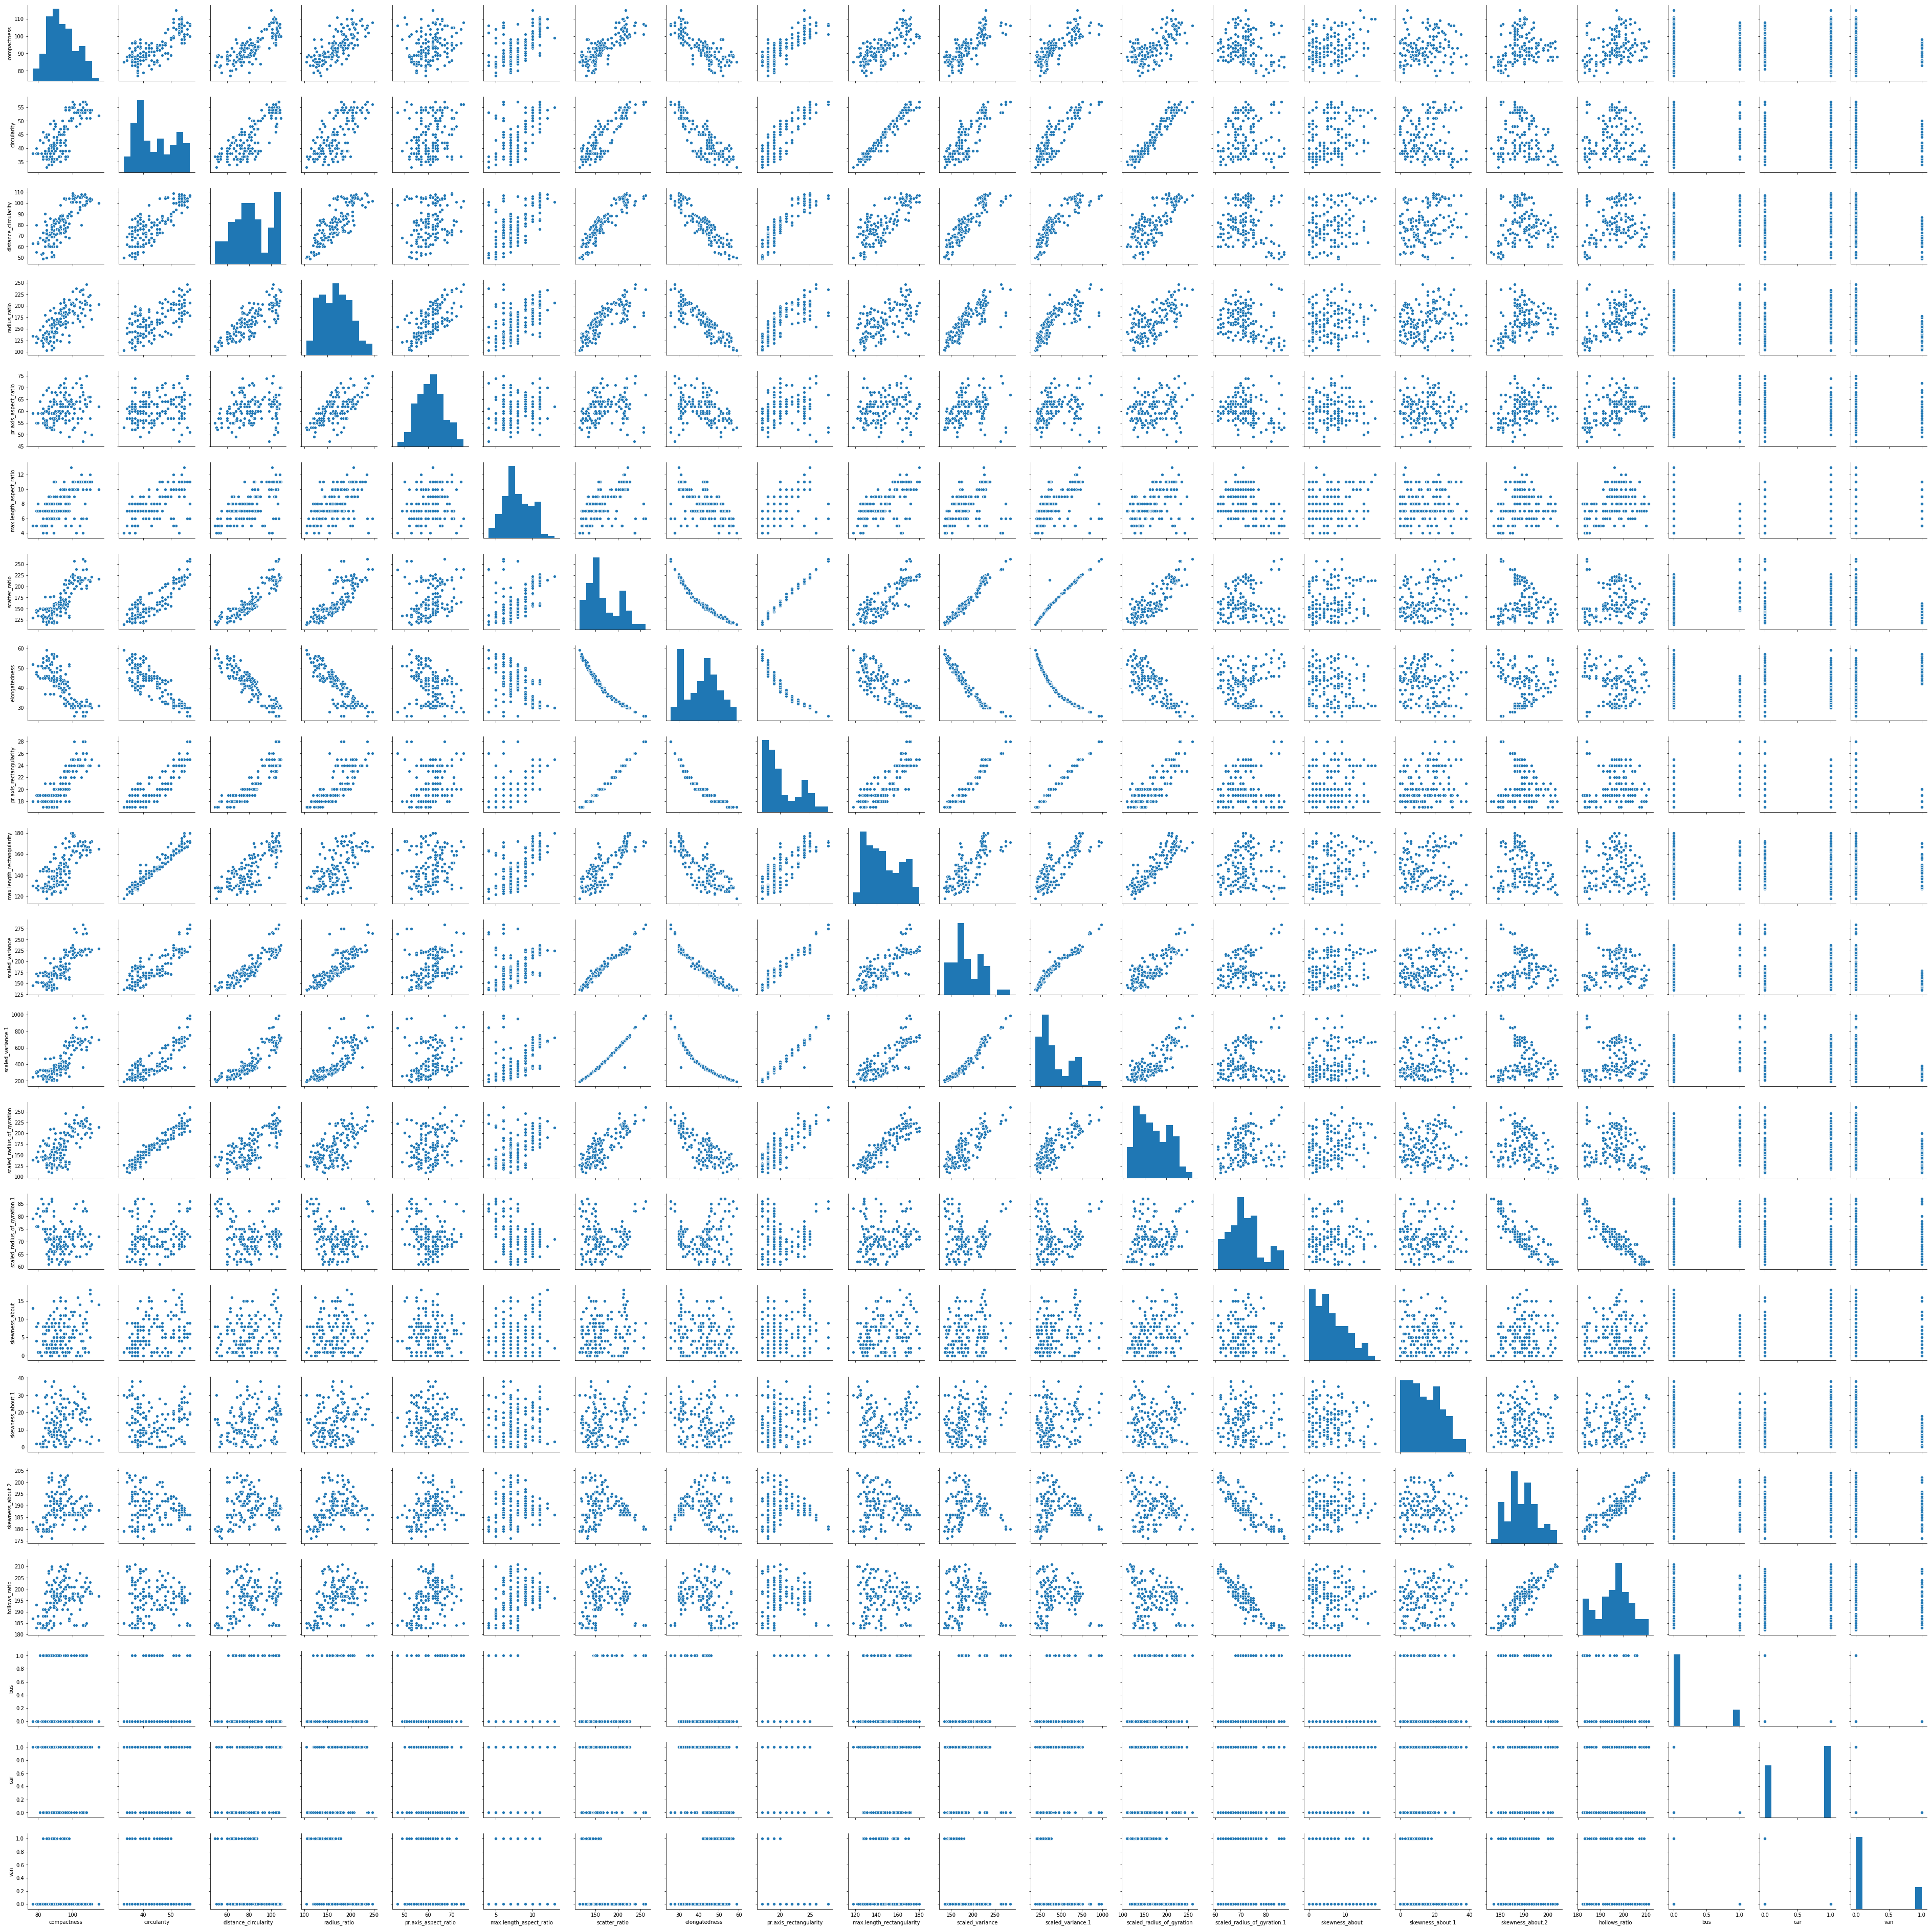

In [321]:
#Highly Correlated variables are as visualized above, and can be better understood with pairplots:
sns.pairplot(capDf.sample(150))

In [322]:
#Let us now construct our feature set
X = capDf.loc[:, 'compactness':'hollows_ratio']
Y = capDf[['bus', 'van', 'car']]

In [323]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
5,107,44.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183


In [324]:
#For correlation purposes only, we will temporariliy use Label Encoder
label_corr_data = pd.concat([X, label_data], axis = 1)
label_corr_data['class'] = label_corr_data['class'].astype('category').cat.codes

In [325]:
label_corr_data['class'].unique()

array([2, 1, 0])

In [326]:
#Let us now drop variables from feature set having correlation in range -0.1 to 0.1 with target variable, if any.
label_X = label_corr_data.iloc[:, label_corr_data.columns != 'class']
label_Y = label_corr_data[['class']]
corr_list = pd.Series(label_corr_data.drop('class', axis=1).apply(lambda x: x.corr(label_corr_data['class'])))
print("Correlation between Independent Variables and Target Variable (class): ")
print(corr_list)
for index, column in enumerate(X):
    if((corr_list[index] > -0.1) & (corr_list[index] < 0.1)):
        print("Variable to be dropped: ", column)

Correlation between Independent Variables and Target Variable (class): 
compactness                   -0.028066
circularity                   -0.150490
distance_circularity          -0.058524
radius_ratio                  -0.225750
pr.axis_aspect_ratio          -0.216582
max.length_aspect_ratio        0.371072
scatter_ratio                 -0.283363
elongatedness                  0.337818
pr.axis_rectangularity        -0.251226
max.length_rectangularity     -0.025047
scaled_variance               -0.329114
scaled_variance.1             -0.282360
scaled_radius_of_gyration     -0.241530
scaled_radius_of_gyration.1   -0.283782
skewness_about                 0.129438
skewness_about.1              -0.013094
skewness_about.2               0.061319
hollows_ratio                  0.231102
dtype: float64
Variable to be dropped:  compactness
Variable to be dropped:  distance_circularity
Variable to be dropped:  max.length_rectangularity
Variable to be dropped:  skewness_about.1
Variable to be dr

In [327]:
#Drop above from original capped dataset
label_X.drop(columns = ['compactness', 'distance_circularity', 
                  'max.length_rectangularity', 'skewness_about.1', 'skewness_about.2'], inplace = True, axis = 1)

In [328]:
label_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 13 columns):
circularity                    813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null float64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
hollows_ratio                  813 non-null int64
dtypes: float64(12), int64(1)
memory usage: 88.9 KB


In [329]:
#Standardization
from sklearn import preprocessing
x_scaled = preprocessing.StandardScaler().fit_transform(label_X)
X_std = pd.DataFrame(x_scaled, columns = label_X.columns)

In [330]:
#Our dataset is now scaled for further processing
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
print('Covariance matrix \n%s' %cov_matrix)

Covariance matrix 
[[ 1.00123153  0.64172521  0.2064097   0.56485407  0.84480461 -0.8167683
   0.84119631  0.80375096  0.83350815  0.92628161  0.06677908  0.14056388
   0.03923026]
 [ 0.64172521  1.00123153  0.66702924  0.46125859  0.79049547 -0.84506457
   0.76476967  0.79377835  0.77709765  0.55122268 -0.40367289  0.04035557
   0.50531432]
 [ 0.2064097   0.66702924  1.00123153  0.13843176  0.20021756 -0.30228932
   0.16996102  0.2150749   0.18652618  0.15369762 -0.32550238 -0.05160262
   0.420318  ]
 [ 0.56485407  0.46125859  0.13843176  1.00123153  0.49807898 -0.50299602
   0.49784507  0.41206882  0.45845616  0.40478632 -0.33316187  0.08410826
   0.39493446]
 [ 0.84480461  0.79049547  0.20021756  0.49807898  1.00123153 -0.97353751
   0.99065973  0.97875155  0.99420481  0.79589385  0.00244703  0.06354904
   0.11632365]
 [-0.8167683  -0.84506457 -0.30228932 -0.50299602 -0.97353751  1.00123153
  -0.95111266 -0.96609099 -0.95697389 -0.76334598  0.08708427 -0.04551356
  -0.2113456 ]
 [ 0

In [331]:
# Step 2 - Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 3.27580762e-01  1.17602261e-01 -1.18130211e-01 -2.18265762e-03
  -3.39696026e-01 -4.34528528e-01  1.02813350e-01  6.00163024e-01
   4.05452044e-01  9.17289460e-02  1.23593740e-01 -4.11745179e-02
  -1.22497959e-02]
 [ 3.15093187e-01 -2.53498856e-01  1.75388640e-01  2.10876112e-01
   6.02279052e-02  1.26468701e-01 -2.83353270e-01  1.22247673e-02
   4.53149471e-02  7.40269969e-01 -3.29844921e-01  2.50587901e-02
  -4.10580589e-02]
 [ 1.21394065e-01 -3.42072050e-01  3.92404372e-01  6.05192059e-01
  -4.09587259e-01  1.74370617e-01  6.16399743e-02  4.63183967e-02
  -9.69384330e-02 -3.28354594e-01  1.61115710e-01 -1.08951103e-02
   2.46796572e-02]
 [ 2.11628607e-01 -1.84335387e-01 -3.10907728e-01 -4.74170515e-01
  -6.04218245e-01  4.55091452e-01 -6.25060439e-02 -1.24325772e-01
  -5.18327650e-02  3.12231138e-02  5.67029411e-02  2.52675999e-02
  -2.57971255e-02]
 [ 3.58595133e-01  7.89450124e-02  2.38511950e-02 -6.19144953e-02
   1.68222328e-01  1.20369729e-01  4.1476

In [332]:
#Let us check if our eigen vectors are valid
for ev in eigenvectors:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Validated successfully.')

Validated successfully.


In [333]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[7.431694584703321, 2.4828493785345382, 1.0971540368085164, 0.864982295516852, 0.6086980936479829, 0.28896346298176284, 0.07783057016098148, 0.058180341205205204, 0.042189004535626254, 0.029643778968400453, 0.020108576623378362, 0.010308838878610943, 0.003406889651580308]


In [334]:
#Above was detailed calculation from reference sources explaining the procedure for calculating covariance matrix
#and eigen values/vectors.
from sklearn.decomposition import PCA

In [335]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 57.09656545  76.17191502  84.60118059  91.24670641  95.92324016
  98.14330196  98.74126225  99.18825285  99.51238448  99.74013307
  99.89462417  99.97382539 100.        ]


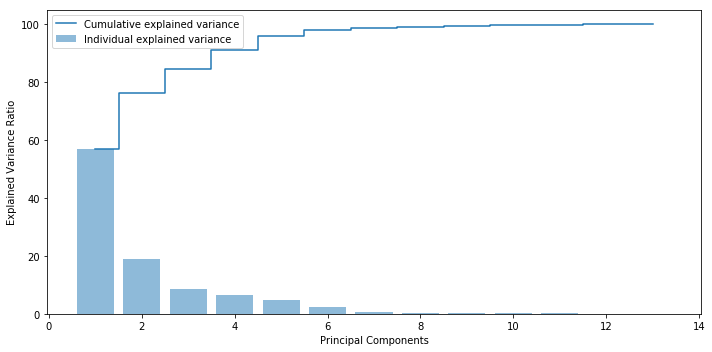

In [336]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [337]:
# Step 4: Project data onto 2d 

# P_reduce is 10 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:10]).transpose()

# Let's project data onto 2D space
# The projected data in 2D will be n x 2 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

In [338]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, label_Y, test_size=test_size, random_state=seed)

In [339]:
# Fit the model on 30%
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9057377049180327


In [344]:
#Model has a healthy score of 90.5% on test set, indicating well trained model and clean data

In [348]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 13 to 5)
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [349]:
comp_features = pd.DataFrame(pca.components_, columns = X_std.columns)

In [350]:
comp_features.corr()

,circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,hollows_ratio
circularity,1.000000,-0.009623,-0.024051,-0.061828,0.107942,-0.026828,0.004886,-0.023511,0.039171,0.152384,-0.040106,0.078480,-0.047692
radius_ratio,-0.009623,1.000000,-0.005553,-0.014276,0.024923,-0.006194,0.001128,-0.005428,0.009044,0.035184,-0.009260,0.018121,-0.011012
pr.axis_aspect_ratio,-0.024051,-0.005553,1.000000,-0.035678,0.062288,-0.015481,0.002820,-0.013567,0.022604,0.087933,-0.023143,0.045287,-0.027521
max.length_aspect_ratio,-0.061828,-0.014276,-0.035678,1.000000,0.160126,-0.039798,0.007248,-0.034877,0.058108,0.226052,-0.059494,0.116420,-0.070748
scatter_ratio,0.107942,0.024923,0.062288,0.160126,1.000000,0.069480,-0.012654,0.060889,-0.101447,-0.394650,0.103867,-0.203251,0.123515
elongatedness,-0.026828,-0.006194,-0.015481,-0.039798,0.069480,1.000000,0.003145,-0.015133,0.025214,0.098086,-0.025815,0.050516,-0.030698
pr.axis_rectangularity,0.004886,0.001128,0.002820,0.007248,-0.012654,0.003145,1.000000,0.002756,-0.004592,-0.017864,0.004702,-0.009200,0.005591
scaled_variance,-0.023511,-0.005428,-0.013567,-0.034877,0.060889,-0.015133,0.002756,1.000000,0.022096,0.085958,-0.022623,0.044270,-0.026903
scaled_variance.1,0.039171,0.009044,0.022604,0.058108,-0.101447,0.025214,-0.004592,0.022096,1.000000,-0.143214,0.037692,-0.073758,0.044822
scaled_radius_of_gyration,0.152384,0.035184,0.087933,0.226052,-0.394650,0.098086,-0.017864,0.085958,-0.143214,1.000000,0.146631,-0.286933,0.174368


Conclusion:

Dimensions which cover over 95% of the variance are 5, reduced from an eligible 13 dimensions after preprocessing of data.